Domain: Hospitals and medicine

Project title: Diabetes Risk Screening using BRFSS Health Indicators (2015)

Problem statement wording: “predict likelihood of diabetes for screening and referral”

Model task: “binary classification for screening (prioritising recall/sensitivity)”

Goal: Build an AI-based diabetes risk screening model using BRFSS 2015 health indicators to flag individuals who may require confirmatory testing, and evaluate performance, limitations, and fairness.

# Part A — Application area review (Literature review)

## Diabetes risk screening using non-lab indicators (Hospitals and medicine)
In this coursework, “diabetes screening” means using easy-to-collect, non-invasive indicators to flag people who are likely to have (or be at high risk of) diabetes, so they can be referred for confirmatory testing (for example HbA1c, fasting plasma glucose, or an oral glucose tolerance test). It is not the same as a clinical diagnosis. This matters because population-level screening can be run cheaply and at scale, and it can help prioritise limited clinical resources toward people most likely to benefit from follow-up testing. Using the BRFSS 2015 health indicators fits this screening framing because the inputs are survey-style risk factors (demographics, BMI, lifestyle, and self-reported comorbidities), not lab values (Chang et al., 2022; Chowdhury, Ayon and Hossain, 2024).

## How AI is being applied to diabetes screening and risk prediction
Recent work shows a consistent pattern: diabetes screening/risk prediction is treated as a binary classification problem on tabular health indicators, where models output a probability and a “screen / don’t screen” label. In BRFSS-style studies, researchers train models on demographic and lifestyle indicators and report discrimination metrics such as ROC-AUC along with classification metrics (accuracy, precision, recall/sensitivity, F1). For example, Chang et al. (2022) compared multiple models on BRFSS health indicators and reported that Random Forest achieved 82.26% accuracy, 80.45% sensitivity, and an AUC of 0.8226, outperforming simpler baselines like Logistic Regression (72.64% accuracy; 73.95% sensitivity). This supports the idea that nonlinear models can capture interactions between risk factors (for example, age group × BMI × hypertension) better than linear baselines.

A recurring issue in BRFSS-based work is class imbalance (fewer diabetes-positive than negative cases). Chowdhury, Ayon and Hossain (2024) explicitly studied resampling and augmentation methods on a large BRFSS dataset (262,958 records; about 18% diabetes-positive) and showed that balancing can shift model behaviour toward better sensitivity/recall, which is often the priority in screening. They report that applying Edited Nearest Neighbours (ENN) with Gradient Boosting achieved recall 0.717 with AUC 0.791, illustrating the trade-off between catching more positives and controlling false alarms (Chowdhury, Ayon and Hossain, 2024).

## Data landscape in the literature (why surveys are common, and what they miss)
Across the literature, diabetes screening/risk prediction uses three main dataset types:

- **Population health surveys (BRFSS-like):** scalable, low-cost, and good for modelling risk from non-lab indicators, but often rely on self-report and may contain noise or missingness (Chang et al., 2022; Muhammad, Sani and Ahmed, 2025).  
- **Lab-anchored health surveys (NHANES-like):** still survey-based, but typically include lab measures, giving stronger ground truth for diabetes status. Riveros Perez and Avella-Molano (2025) used NHANES 2007–2018 and found models such as XGBoost reached AUC 0.8168, with reported accuracy around 85% and specificity ~0.95 (depending on model/threshold), showing performance is strong even when lifestyle-focused features are used (Riveros Perez and Avella-Molano, 2025).  
- **Clinical/EHR datasets:** richer longitudinal signals, but harder to access, messy, and less transferable due to coding practices and site-specific bias (this coursework uses BRFSS, so EHR work mainly informs evaluation expectations, not data choice).  

Survey indicators remain common because they support “screening-style” deployment: they are cheap to collect and can be used for population-level targeting, even though confirmatory testing is still required.

## Model families used in diabetes screening papers
- **Classical baselines (Logistic Regression and similar):** Logistic Regression appears everywhere because it is fast, stable, and interpretable. Chang et al. (2022) show it performs reasonably but is typically beaten by ensembles (Chang et al., 2022). Baselines are important because they set an “honest minimum” and are easier to justify to non-technical stakeholders.  
- **Tree ensembles (Random Forest, Gradient Boosting/XGBoost):** These models handle nonlinear interactions in tabular data well. In the BRFSS setting, Random Forest reached 82.26% accuracy and AUC 0.8226 in Chang et al. (2022) (Chang et al., 2022). In another study, Liu et al. (2024) report XGBoost AUC 0.83 and use SHAP to identify major drivers such as general health, high blood pressure, and BMI, which is useful for communicating why someone is flagged (Liu et al., 2024). This aligns with screening needs: good predictive performance plus a defensible explanation layer.  
- **Explainability-first approaches (SHAP/LIME on top of strong models):** A common pattern is “best-performing model + post-hoc explanations.” Ahmed et al. (2025) discuss explainable ML using SHAP/LIME and report an XGBoost-based approach achieving 86% accuracy, arguing that interpretability helps trust and adoption (Ahmed et al., 2025). Muhammad, Sani and Ahmed (2025), using BRFSS 2023 Tennessee adults, report a Gradient Boosting model with AUROC 0.80 and PR-AUC 0.45, but also highlight screening-relevant pain points: recall 32% despite accuracy 82%, reminding that raw accuracy can look good even when many positives are missed (Muhammad, Sani and Ahmed, 2025).  

## Evaluation patterns that matter for screening (and what “good” looks like)
Most papers report ROC-AUC and standard classification metrics, but stronger work also addresses:

- **Thresholding:** Screening often prioritises sensitivity/recall, so the probability threshold should be tuned for that objective (not left at 0.5 by default).  
- **Imbalance-aware metrics:** PR-AUC is useful when positives are relatively rare; Muhammad, Sani and Ahmed (2025) explicitly report PR-AUC (Muhammad, Sani and Ahmed, 2025).  
- **Calibration:** For screening, probabilities should be meaningful. Huang et al. (2020) explain that predictive models are often published using discrimination metrics, but individualised prediction requires adequate calibration, and they outline standard calibration evaluation and recalibration approaches (Huang et al., 2020).  
- **Fairness/subgroup performance:** Cronjé et al. (2023) show that diabetes risk models can be miscalibrated differently across racial groups, which can distort who gets prioritised for preventive interventions (Cronjé et al., 2023). For a screening tool, subgroup checks are not optional: they directly affect equity.  

## ChatGPT disclosure
ChatGPT was used to structure the literature review and summarise themes. All papers were selected by me and the statistics reported are taken directly from the cited sources.


# Part B — Compare and evaluate three AI techniques

## Technique 1: Logistic Regression (baseline screening classifier)
**Data availability:** Logistic Regression works well with BRFSS-style tabular indicators (categorical + numeric). Categorical variables need encoding, and missing values must be handled (imputation or removal).  

**Time to set up:** Low. A simple pipeline (encode → train → evaluate) runs quickly and is easy to reproduce. Hyperparameters are minimal, and training is fast even on large datasets.  

**Time to produce results:** Very fast. This makes Logistic Regression ideal for quick iteration, debugging data issues, and establishing a baseline.  

**Output:** A probability score and a binary label after thresholding. Coefficients also provide direct interpretability (direction and strength of association), which is useful when justifying screening decisions.  

**Reported performance in the selected papers:** In Chang et al. (2022), Logistic Regression achieved 72.64% accuracy, 73.95% sensitivity, and 71.34% specificity on BRFSS health indicators. This was outperformed by Random Forest (82.26% accuracy; 80.45% sensitivity) (Chang et al., 2022).  

**Strengths and limitations for screening:** The strength is transparency and speed. The main limitation is model capacity: Logistic Regression can miss nonlinear interactions common in health risk (for example, combined effects of obesity, hypertension, and age). It remains valuable as a benchmark and a “simple model” option where interpretability is prioritised.

## Technique 2: Random Forest (robust non-linear tabular model)
**Data availability:** Random Forest fits BRFSS feature types well. It is tolerant to mixed feature scales and can capture nonlinear effects without extensive feature engineering. Categorical encoding is required, but scaling is usually unnecessary.  

**Time to set up:** Moderate. Training is straightforward, but typical tuning includes tree count, depth controls, and class weights. Proper validation is needed to reduce overfitting risk.  

**Time to produce results:** Fast to moderate depending on dataset size and tree count, and generally feasible for BRFSS-scale datasets.  

**Output:** Probability estimates (via vote proportions) and class labels after thresholding. It also supports interpretability via feature importance and SHAP-based explanations.  

**Reported performance in the selected papers:** Chang et al. (2022) reported Random Forest as the best-performing model in their comparison, with 82.26% accuracy, 80.45% sensitivity, and AUC 0.8226 (Chang et al., 2022).  

**Strengths and limitations for screening:** Random Forest offers strong performance with limited feature engineering. However, probability calibration can be imperfect and bias can reflect training data patterns. In imbalanced screening settings, class weighting or balanced resampling can be used to improve sensitivity, but this typically increases false positives and must be managed via threshold selection. For screening, calibration and subgroup checks should be performed before probabilities are used for referral thresholds (Huang et al., 2020; Cronjé et al., 2023).

## Technique 3: Gradient Boosting / XGBoost (high-performing ensemble for screening)
**Data availability:** Boosting works well for BRFSS-style tabular features after encoding and basic preprocessing. It is commonly paired with imbalance handling (resampling or class-weighting) and explainability (SHAP).  

**Time to set up:** Moderate to high. Boosting has more hyperparameters (learning rate, number of trees, depth, regularisation), and it can overfit if tuning is not controlled.  

**Time to produce results:** Moderate. Training can be slower than Logistic Regression or Random Forest, but remains practical for BRFSS-scale datasets with sensible settings.  

**Output:** Probability scores and labels, with strong compatibility with SHAP for explanation.  

**Reported performance in the selected papers:** Liu et al. (2024) reported XGBoost AUC 0.83 and used SHAP to highlight general health, high blood pressure, and BMI as key predictors (Liu et al., 2024). Chowdhury, Ayon and Hossain (2024) showed that combining ENN with Gradient Boosting can increase screening-relevant recall to 0.717 with AUC 0.791 (Chowdhury, Ayon and Hossain, 2024). Muhammad, Sani and Ahmed (2025) reported AUROC 0.80 and PR-AUC 0.45 and noted recall can be low if thresholds and imbalance are not handled carefully (Muhammad, Sani and Ahmed, 2025).  

**Strengths and limitations for screening:** Boosting often provides strong discrimination, but it demands disciplined evaluation: threshold tuning to prioritise sensitivity, calibration checks for reliable probabilities, and subgroup fairness checks (Huang et al., 2020; Cronjé et al., 2023).  




| Aspect | Logistic Regression (LR) | Random Forest (RF) | Gradient Boosting / XGBoost (GB/XGB) |
|---|---|---|---|
| Learning type | Supervised binary classification | Supervised binary classification | Supervised binary classification |
| Input requirements | Encoded tabular features; handle missing values | Encoded tabular features; handle missing values | Encoded tabular features; handle missing values |
| Scaling / normalisation | Sometimes helpful (esp. for optimisation), not always required | Not required | Not required |
| Non-linearity & interactions | Limited (linear unless features engineered) | Strong (captures interactions naturally) | Strong (captures complex interactions) |
| Output | Probability + class label (thresholded) | Probability + class label (thresholded) | Probability + class label (thresholded) |
| Interpretability | High (coefficients are directly interpretable) | Medium (feature importance; SHAP possible) | Medium (SHAP commonly used; less transparent than LR) |
| Time to set up | Low | Moderate | Moderate–high |
| Time to produce results | Very fast | Fast–moderate | Moderate |
| Main strengths | Transparent baseline; stable; easy to justify | Strong performance on tabular data; robust interactions | Often best discrimination on tabular data; works well with SHAP explanations |
| Main limitations | Misses nonlinear patterns; may underperform ensembles | Can be less calibrated; bias can reflect training data | Higher overfitting risk if tuning/validation is weak; more tuning effort |
| Handling class imbalance | Class weights; threshold tuning; resampling | Class weights; balanced sampling; threshold tuning | Class weights/resampling; threshold tuning (often critical) |
| Calibration / probability reliability | Often reasonably calibrated, but should still be checked and recalibrated if needed | Probabilities can be miscalibrated; calibration checks recommended | Probabilities can be miscalibrated; calibration checks/recalibration often needed |
| Screening suitability (prioritise recall) | Good baseline; recall improved via lower threshold but may raise false positives | Good choice; can achieve strong recall with tuning | Very suitable; can target high recall but needs disciplined threshold selection and validation |


## Technique choice for Part C (prototype)
Gradient Boosting/XGBoost will be implemented as the single prototype model in Part C because it is well-suited to tabular health-indicator data, captures non-linear interactions between risk factors, and supports SHAP explanations for defensible screening decisions. The probability threshold will be selected on a validation set to prioritise sensitivity/recall, and the final thresholded performance will be reported once on the held-out test set to avoid optimistic bias.

The choice is justified using the comparative findings from Part B (Logistic Regression and Random Forest) and evaluated using screening-relevant criteria, including recall/sensitivity, PR-AUC under class imbalance, calibration of predicted probabilities, and subgroup performance to check for systematic degradation across demographic groups.


### References

Ahmed, S., Kaiser, M.S., Hossain, M.S. and Andersson, K. (2025) ‘A comparative analysis of LIME and SHAP interpreters with explainable ML-based diabetes predictions’, *IEEE Access*, 13, pp. 37370–37388. Available from: http://dx.doi.org/10.1109/ACCESS.2024.3422319 [Accessed 13 January 2026].

Chang, V., Ganatra, M.A., Hall, K., Golightly, L. and Xu, Q.A. (2022) ‘An assessment of machine learning models and algorithms for early prediction and diagnosis of diabetes using health indicators’, *Healthcare Analytics*, 2, 100118. Available from: http://dx.doi.org/10.1016/j.health.2022.100118 [Accessed 13 January 2026].

Chowdhury, M.M., Ayon, R.S. and Hossain, M.S. (2024) ‘An investigation of machine learning algorithms and data augmentation techniques for diabetes diagnosis using class imbalanced BRFSS dataset’, *Healthcare Analytics*, 5, 100297. Available from: http://dx.doi.org/10.1016/j.health.2023.100297 [Accessed 13 January 2026].

Cronjé, H.T., Katsiferis, A., Elsenburg, L.K., Andersen, T.O., Rod, N.H., Nguyen, T-L. and Varga, T.V. (2023) ‘Assessing racial bias in type 2 diabetes risk prediction algorithms’, *PLOS Global Public Health*, 3(5), e0001556. Available from: http://dx.doi.org/10.1371/journal.pgph.0001556 [Accessed 13 January 2026].

Huang, Y., Li, W., Macheret, F., Gabriel, R.A. and Ohno-Machado, L. (2020) ‘A tutorial on calibration measurements and calibration models for clinical prediction models’, *Journal of the American Medical Informatics Association*, 27(4), pp. 621–633. Available from: http://dx.doi.org/10.1093/jamia/ocz228 [Accessed 13 January 2026].

Liu, Z., Zhang, Q., Zheng, H., Chen, S. and Gong, Y. (2024) ‘A comparative study of machine learning approaches for diabetes risk prediction: insights from SHAP and feature importance’, in *2024 5th International Conference on Machine Learning and Computer Application (ICMLCA)*. IEEE, pp. 35–38. Available from: http://dx.doi.org/10.1109/ICMLCA63499.2024.10754491 [Accessed 13 January 2026].

Muhammad, M.A., Sani, J. and Ahmed, M.M. (2025) ‘Exploring explainable machine learning for predicting and interpreting self-reported diabetes among Tennessee adults: insights from the 2023 Behavioral Risk Factor Surveillance System (BRFSS)’, *Journal of Primary Care & Community Health*, 16, pp. 1–17. Available from: http://dx.doi.org/10.1177/21501319251400546 [Accessed 13 January 2026].

Riveros Perez, E. and Avella-Molano, B. (2025) ‘Learning from the machine: is diabetes in adults predicted by lifestyle variables? A retrospective predictive modelling study of NHANES 2007–2018’, *BMJ Open*, 15, e096595. Available from: http://dx.doi.org/10.1136/bmjopen-2024-096595 [Accessed 13 January 2026].


## Part C — High-level architecture

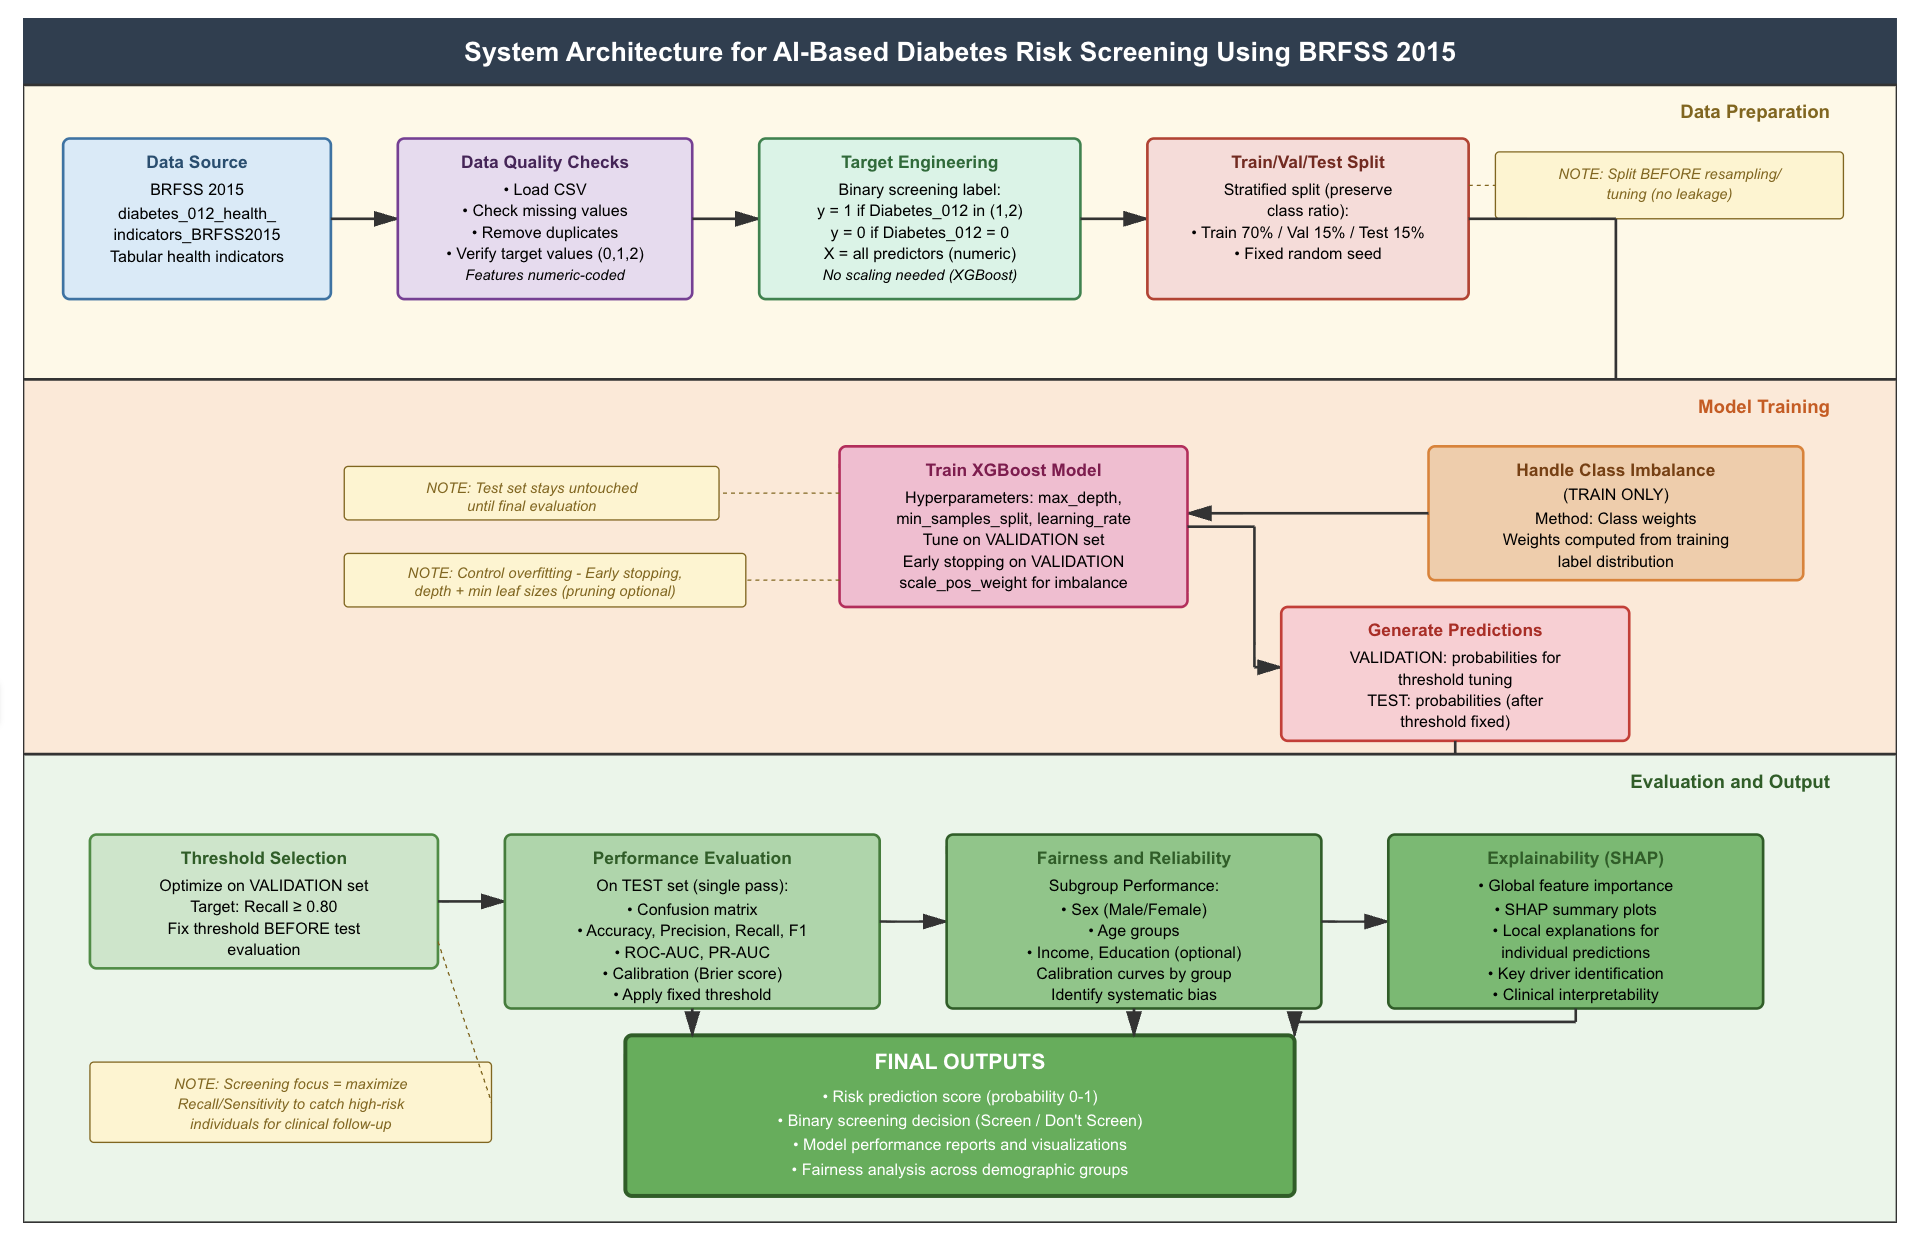

# Part C — Implementation (Prototype Notebook): XGBoost Diabetes Risk Screening (BRFSS 2015)


## Goal

This prototype builds an **AI-based diabetes risk screening** model using **non-lab BRFSS 2015 health indicators**.  
“Screening” here means **flagging people likely to be at risk** so they can be referred for **confirmatory testing** (e.g., HbA1c, fasting plasma glucose, OGTT). It is **not** a diagnosis.

**Technique implemented (single technique for Part C):** XGBoost (gradient-boosted decision trees)

**Binary screening label (Option A):**
- `y = 1` if `Diabetes_012 ∈ {1, 2}` (prediabetes or diabetes)
- `y = 0` if `Diabetes_012 = 0` (no diabetes)

**Evaluation focus:** prioritise **recall/sensitivity** (catch at-risk individuals), with the decision threshold chosen on the **validation** set and fixed before the **test** evaluation.


In [ ]:
!pip -q install xgboost shap kagglehub[pandas-datasets]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve,
    brier_score_loss
)
from sklearn.calibration import calibration_curve

from xgboost import XGBClassifier
import shap

import warnings
warnings.filterwarnings("ignore")

SEED = 42
np.random.seed(SEED)


## Input/Data source (CSV) and “marker runnable” requirement

**Input file type:** CSV  
**Dataset:** BRFSS 2015 “Diabetes Health Indicators”  
**Target column:** `Diabetes_012`

The notebook attempts to load the dataset **directly from Kaggle** first.  
If Kaggle access is blocked in the marker environment, it automatically falls back to a public mirror so the notebook still runs **without manual configuration**.


In [ ]:
DATASET_HANDLE = "alexteboul/diabetes-health-indicators-dataset"
FILE_PATH = "diabetes_012_health_indicators_BRFSS2015.csv"

def load_brfss_kaggle_first():
    # KaggleHub (Kaggle-first)
    try:
        import kagglehub
        from kagglehub import KaggleDatasetAdapter
        df = kagglehub.dataset_load(
            KaggleDatasetAdapter.PANDAS,
            DATASET_HANDLE,
            FILE_PATH,
        )
        print(f"Loaded from KaggleHub: {DATASET_HANDLE}/{FILE_PATH}")
        return df
    except Exception as e:
        print("KaggleHub load failed (fallback will be used). Reason:", str(e)[:200], "...")

    # Public mirror fallback (no login required)
    # (Use a stable public raw CSV mirror; if you host your own mirror, replace the URL here.)
    try:
        url = "https://raw.githubusercontent.com/deephaven/examples/main/Diabetes/diabetes_012_health_indicators_BRFSS2015.csv"
        df = pd.read_csv(url)
        print("Loaded from public mirror fallback (no configuration required).")
        return df
    except Exception as e:
        print("Mirror fallback failed. Reason:", str(e)[:200], "...")
        raise RuntimeError("Dataset could not be loaded from Kaggle or fallback mirror.")

df = load_brfss_kaggle_first()
print("DataFrame shape:", df.shape)
df.head()


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Loaded from KaggleHub: alexteboul/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
DataFrame shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Input data format (CSV)

- **Rows:** printed below (must be >1000; BRFSS is large-scale)
- **Columns:** printed below
- **Feature types:** numeric-coded indicators (tabular)
- **Target:** `Diabetes_012` with values typically in `{0,1,2}`

The next cell prints:
- dataset size (rows/columns)
- column list
- target distribution
- missing values summary


In [ ]:
df.columns = [c.strip() for c in df.columns]  # keep original-style names for readability

print("Rows:", len(df))
print("Columns:", len(df.columns))
print("\nColumns:\n", df.columns.tolist())

target_col = "Diabetes_012"
if target_col not in df.columns:
    raise ValueError(f"Expected target column '{target_col}' not found. Found columns: {df.columns.tolist()[:10]} ...")

print("\nTarget distribution (Diabetes_012):")
print(df[target_col].value_counts(dropna=False).sort_index())

missing_by_col = df.isna().sum()
print("\nTotal missing values:", int(missing_by_col.sum()))
print("Columns with missing values:", int((missing_by_col > 0).sum()))


Rows: 253680
Columns: 22

Columns:
 ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Target distribution (Diabetes_012):
Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

Total missing values: 0
Columns with missing values: 0


## Pre-processing implemented (exact steps)

1) **Column standardisation:** convert feature columns to numeric (dataset is numeric-coded).
2) **Remove exact duplicates (pre-split):** avoids optimistic evaluation if identical rows appear in both train and test.
3) **Target engineering (Option A):** binary screening label from `Diabetes_012`.
4) **Train/Val/Test split (70/15/15, stratified):** preserves class ratio and prevents leakage.
5) **Missing values:** if present, **median imputation fitted on TRAIN only** (no leakage).
6) **Imbalance handling (TRAIN only):** `scale_pos_weight = #neg/#pos` for XGBoost.


In [ ]:
# 1) Remove exact duplicates before splitting (reduces optimistic bias)
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed exact duplicate rows: {before - after} (remaining: {after})")

# 2) Binary label (Option A): y=1 if Diabetes_012 in {1,2} else 0
y = df[target_col].isin([1, 2]).astype(int)

# 3) Features: all other columns
X = df.drop(columns=[target_col])

# Convert to numeric (BRFSS indicators are numeric-coded; coerce just in case)
X = X.apply(pd.to_numeric, errors="coerce")

print("X shape:", X.shape)
print("Positive rate (y=1):", y.mean().round(4))


Removed exact duplicate rows: 23899 (remaining: 229781)
X shape: (229781, 21)
Positive rate (y=1): 0.1729


In [ ]:
idx = np.arange(len(df))

idx_trainval, idx_test = train_test_split(
    idx, test_size=0.15, stratify=y, random_state=SEED
)
idx_train, idx_val = train_test_split(
    idx_trainval, test_size=0.15/0.85, stratify=y.iloc[idx_trainval], random_state=SEED
)

X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
X_val,   y_val   = X.iloc[idx_val],   y.iloc[idx_val]
X_test,  y_test  = X.iloc[idx_test],  y.iloc[idx_test]

print("Train:", X_train.shape, "Pos rate:", y_train.mean().round(4))
print("Val:  ", X_val.shape,   "Pos rate:", y_val.mean().round(4))
print("Test: ", X_test.shape,  "Pos rate:", y_test.mean().round(4))


Train: (160846, 21) Pos rate: 0.1729
Val:   (34467, 21) Pos rate: 0.1729
Test:  (34468, 21) Pos rate: 0.1729


In [ ]:
imputer = SimpleImputer(strategy="median")

X_train_imp = imputer.fit_transform(X_train)  # fit on TRAIN only
X_val_imp   = imputer.transform(X_val)
X_test_imp  = imputer.transform(X_test)

feature_names = X.columns.tolist()

print("Imputation done (median, fitted on TRAIN only).")


Imputation done (median, fitted on TRAIN only).


In [ ]:
pos = int(y_train.sum())
neg = int((1 - y_train).sum())
scale_pos_weight = neg / max(pos, 1)

print("Train positives:", pos)
print("Train negatives:", neg)
print("scale_pos_weight (neg/pos):", round(scale_pos_weight, 4))


Train positives: 27808
Train negatives: 133038
scale_pos_weight (neg/pos): 4.7842


## Technique implementation: XGBoost (single prototype technique)

XGBoost is trained on the **training** set and monitored on the **validation** set using early stopping to limit overfitting.  
The evaluation metric for early stopping is set to **AUC-PR** (`aucpr`), which is useful for imbalanced screening tasks.


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_weight=1,
    objective="binary:logistic",
    eval_metric="aucpr",
    tree_method="hist",
    random_state=SEED,
    scale_pos_weight=scale_pos_weight,
    early_stopping_rounds=50,   # ✅ moved here
)

xgb.fit(
    X_train_imp, y_train,
    eval_set=[(X_val_imp, y_val)],
    verbose=False
)

print("Best iteration:", xgb.best_iteration)


Best iteration: 328


In [ ]:
best_it = xgb.best_iteration  # 328

val_proba = xgb.predict_proba(
    X_val_imp,
    iteration_range=(0, best_it + 1)
)[:, 1]

test_proba = xgb.predict_proba(
    X_test_imp,
    iteration_range=(0, best_it + 1)
)[:, 1]


In [ ]:
print("best_iteration:", xgb.best_iteration)
print("n_estimators:", xgb.n_estimators)


best_iteration: 328
n_estimators: 2000


## Threshold selection (screening objective: prioritise recall)

The default threshold 0.5 is not automatically appropriate for screening.  
Here, the threshold is selected using the **validation** set to achieve **high recall (≥ 0.80)**.  
Among thresholds meeting that recall target, the one with the **highest specificity** is chosen to reduce unnecessary follow-up testing.

The chosen threshold is then **fixed** and applied once to the **test** set (no test-set tuning).


In [ ]:
from sklearn.metrics import confusion_matrix

best_it = xgb.best_iteration

# Use best_iteration (early-stopped model) for validation probabilities
val_proba = xgb.predict_proba(X_val_imp, iteration_range=(0, best_it + 1))[:, 1]

def pick_threshold_recall_constraint(y_true, proba, target_recall=0.80):
    thresholds = np.linspace(0.0, 1.0, 1001)
    best = None  # (specificity, threshold, recall, precision, f1)

    for thr in thresholds:
        pred = (proba >= thr).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_true, pred).ravel()
        recall = tp / (tp + fn) if (tp + fn) else 0.0
        specificity = tn / (tn + fp) if (tn + fp) else 0.0
        precision = tp / (tp + fp) if (tp + fp) else 0.0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0.0

        # Keep thresholds that meet recall target; among them prefer higher specificity
        if recall >= target_recall:
            if (best is None) or (specificity > best[0]) or (specificity == best[0] and thr > best[1]):
                best = (specificity, thr, recall, precision, f1)

    return best

target_recall = 0.80
best = pick_threshold_recall_constraint(y_val.values, val_proba, target_recall=target_recall)

if best is None:
    chosen_thr = 0.5
    print("No threshold achieved the recall target; using 0.5 as fallback.")
else:
    specificity, chosen_thr, recall, precision, f1 = best
    print(f"Chosen threshold: {chosen_thr:.3f}")
    print(f"Validation recall: {recall:.3f} | specificity: {specificity:.3f} | precision: {precision:.3f} | F1: {f1:.3f}")


Chosen threshold: 0.480
Validation recall: 0.801 | specificity: 0.673 | precision: 0.339 | F1: 0.476


## Final evaluation on TEST (single pass, threshold fixed)

This section outputs:
- Confusion matrix
- Accuracy, Precision, Recall (Sensitivity), Specificity, F1
- ROC-AUC and PR-AUC
- ROC curve and Precision–Recall curve


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)

# Predict probabilities using the best_iteration range (XGBoost v3+ compatible)
best_it = int(xgb.best_iteration)  # already computed earlier
test_proba = xgb.predict_proba(X_test_imp, iteration_range=(0, best_it + 1))[:, 1]
test_pred = (test_proba >= chosen_thr).astype(int)

# Confusion matrix numbers
tn, fp, fn, tp = confusion_matrix(y_test, test_pred, labels=[0, 1]).ravel()
specificity = tn / (tn + fp) if (tn + fp) else 0.0

metrics = {
    "Accuracy": accuracy_score(y_test, test_pred),
    "Precision": precision_score(y_test, test_pred, zero_division=0),
    "Recall (Sensitivity)": recall_score(y_test, test_pred, zero_division=0),
    "Specificity": specificity,
    "F1": f1_score(y_test, test_pred, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, test_proba),
    "PR-AUC (AP)": average_precision_score(y_test, test_proba),
}

print("Confusion Matrix [tn fp; fn tp]:")
print(np.array([[tn, fp], [fn, tp]]))

print("\nTest metrics (threshold fixed):")
for k, v in metrics.items():
    print(f"{k:18s}: {v:.4f}")


Confusion Matrix [tn fp; fn tp]:
[[19375  9134]
 [ 1219  4740]]

Test metrics (threshold fixed):
Accuracy          : 0.6996
Precision         : 0.3416
Recall (Sensitivity): 0.7954
Specificity       : 0.6796
F1                : 0.4780
ROC-AUC           : 0.8155
PR-AUC (AP)       : 0.4746


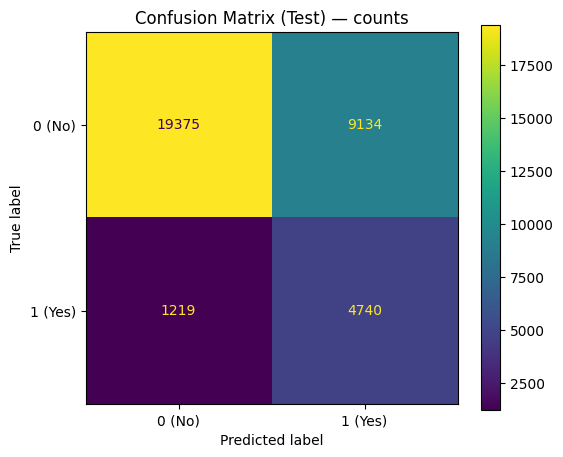

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0 (No)", "1 (Yes)"])
disp.plot(ax=ax, cmap="viridis", values_format="d", colorbar=True)
ax.set_title("Confusion Matrix (Test) — counts")
plt.show()


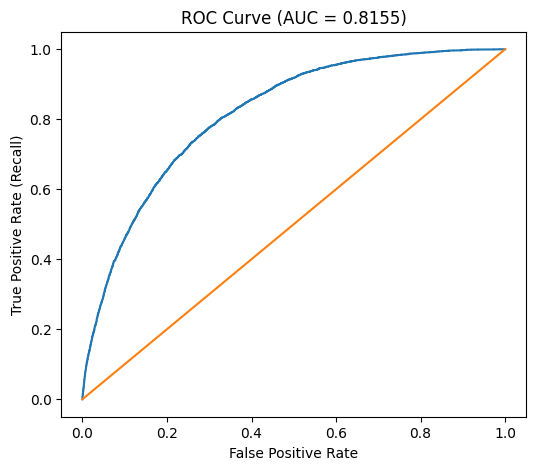

In [ ]:
fpr, tpr, _ = roc_curve(y_test, test_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve (AUC = {metrics['ROC-AUC']:.4f})")
plt.show()


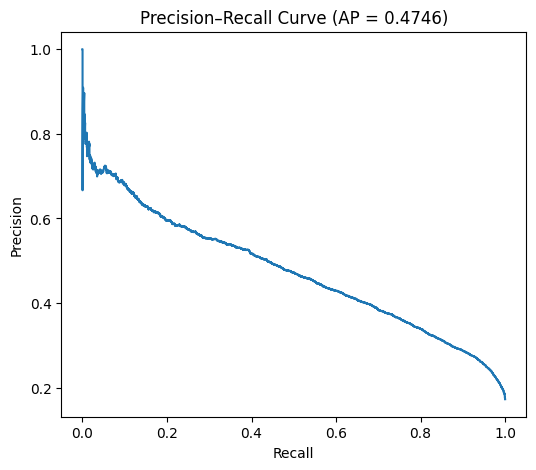

In [ ]:
prec, rec, _ = precision_recall_curve(y_test, test_proba)

plt.figure(figsize=(6, 5))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {metrics['PR-AUC (AP)']:.4f})")
plt.show()


In [40]:
from sklearn.metrics import average_precision_score
import numpy as np

# PR-AUC baseline reference: compare against prevalence ("no-skill" classifier)
test_pos_rate = float(np.mean(y_test == 1))
val_pos_rate  = float(np.mean(y_val == 1))

pr_auc_test = average_precision_score(y_test, test_proba)

print(f"Positive rate (VAL):  {val_pos_rate:.4f}")
print(f"Positive rate (TEST): {test_pos_rate:.4f}")

print(f"\nPR-AUC (Average Precision) on TEST: {pr_auc_test:.4f}")
print("No-skill PR-AUC baseline is approximately the positive rate.")
print(f"PR-AUC lift over baseline (TEST): {pr_auc_test - test_pos_rate:.4f}")


Positive rate (VAL):  0.1729
Positive rate (TEST): 0.1729

PR-AUC (Average Precision) on TEST: 0.4746
No-skill PR-AUC baseline is approximately the positive rate.
PR-AUC lift over baseline (TEST): 0.3017


## Calibration (probability reliability)

Calibration matters because screening decisions may rely on predicted probabilities.  
This section reports:
- Brier score (overall probability error)
- Calibration curve (predicted vs observed)


Brier score (lower is better): 0.1797


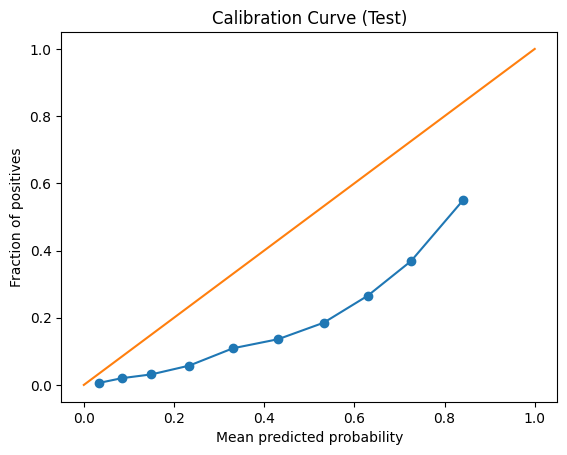

In [ ]:
brier = brier_score_loss(y_test, test_proba)
print("Brier score (lower is better):", round(brier, 4))

frac_pos, mean_pred = calibration_curve(y_test, test_proba, n_bins=10, strategy="quantile")

plt.figure()
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0,1], [0,1])
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve (Test)")
plt.show()


## Results interpretation (screening objective)

The model was tuned for a screening objective by selecting the decision threshold on the validation set to achieve recall ≥ 0.80. On the held-out test set, recall is ~0.80, meaning most diabetes-positive (or pre-diabetes/diabetes-positive) cases are flagged for follow-up testing. This comes with a trade-off: precision is ~0.34, so many flagged individuals will be false positives, which is expected in screening where sensitivity is prioritised over reducing referrals.

Discrimination is strong (ROC-AUC ~0.82), indicating good ranking ability, while PR-AUC is ~0.47, which is more informative than ROC-AUC under class imbalance. Calibration results (Brier score and calibration curve) indicate whether predicted probabilities are reliable for threshold-based decisions; any systematic deviation from the diagonal suggests miscalibration and motivates cautious use of raw probabilities for decision-making without recalibration.

Overall, these results are consistent with a screening tool: high recall to minimise missed at-risk individuals, with acceptable specificity and a manageable false-positive rate depending on follow-up capacity.


## Subgroup performance (fairness check)

Subgroup performance is evaluated on the test set using the **same fixed threshold**.  
Minimum subgroups:
- Sex
- Age group (coarse split)

This checks whether the model’s screening performance degrades systematically for particular demographic groups.


In [ ]:
# subgroup columns available in BRFSS 2015 indicators dataset
subgroup_cols = [c for c in ["Sex", "Age"] if c in df.columns]
sub_test = df.iloc[idx_test][subgroup_cols].copy()

def metrics_at_threshold(y_true, proba, thr):
    pred = (proba >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, pred).ravel()
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    specificity = tn / (tn + fp) if (tn + fp) else 0.0
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0.0
    return {"n": len(y_true), "pos_rate": float(np.mean(y_true)), "recall": recall, "specificity": specificity, "precision": precision, "f1": f1}

rows = []

# Sex
if "Sex" in sub_test.columns:
    for g in sorted(sub_test["Sex"].dropna().unique()):
        mask = (sub_test["Sex"] == g).values
        r = metrics_at_threshold(y_test.values[mask], test_proba[mask], chosen_thr)
        r["group"] = f"Sex={int(g)}"
        rows.append(r)

# Age (coarse grouping based on typical coding: <=6 vs >6)
if "Age" in sub_test.columns:
    age_vals = sub_test["Age"].values
    mask_young = age_vals <= 6
    mask_old = age_vals > 6

    r1 = metrics_at_threshold(y_test.values[mask_young], test_proba[mask_young], chosen_thr)
    r1["group"] = "Age<=6 (younger)"
    rows.append(r1)

    r2 = metrics_at_threshold(y_test.values[mask_old], test_proba[mask_old], chosen_thr)
    r2["group"] = "Age>6 (older)"
    rows.append(r2)

pd.DataFrame(rows).sort_values("group")


,n,pos_rate,recall,specificity,precision,f1,group
2,9898,0.070822,0.554922,0.911167,0.322554,0.407971,Age<=6 (younger)
3,24570,0.214001,0.827501,0.569335,0.343464,0.485440,Age>6 (older)
0,19221,0.163259,0.784257,0.710875,0.346084,0.480242,Sex=0
1,15247,0.185020,0.807870,0.639144,0.336981,0.475584,Sex=1


## Subgroup performance interpretation (fairness check)

Subgroup evaluation was performed using the same fixed threshold selected on the validation set (to avoid “moving the goalposts” per group). Results indicate that performance is not uniform across subgroups. For example, recall is lower for the younger age group than the older age group, which means a higher proportion of at-risk younger individuals may be missed at the same operating point. Differences are also visible between sex groups.

This does not prove unfairness by itself, but it is a practical warning for screening deployment: subgroup gaps can translate into unequal access to follow-up testing. Therefore, subgroup reporting is included alongside overall metrics, and any large gaps should be investigated (e.g., feature distribution differences, prevalence differences, or threshold sensitivity).


## Explainability (SHAP)

SHAP is used for global explanations (feature importance and directionality) to support defensible screening decisions on tabular health indicators.

For runtime stability, SHAP is computed on a subset of the test set.


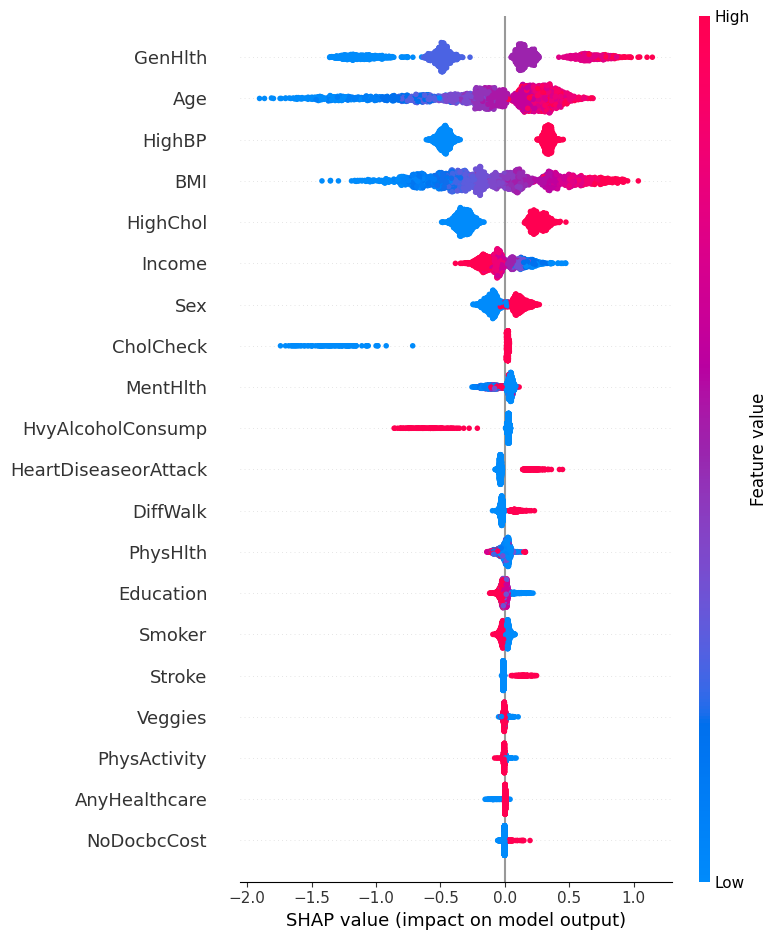

In [ ]:
# SHAP can be slow on the full test set; use a subset for marker runtime
sample_size = min(2000, X_test_imp.shape[0])
X_shap = X_test_imp[:sample_size]
X_shap_df = X_test.iloc[:sample_size]

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_shap)

shap.summary_plot(shap_values, X_shap_df, feature_names=feature_names, show=True)


In [51]:
# After split: X_train, X_val, X_test are DataFrames with columns + index

feature_names = X_train.columns.tolist()

# Impute (arrays)
X_train_imp = imputer.fit_transform(X_train)
X_val_imp   = imputer.transform(X_val)
X_test_imp  = imputer.transform(X_test)

# Convert back to DataFrames (restore feature names + keep row alignment)
import pandas as pd
X_train_imp = pd.DataFrame(X_train_imp, columns=feature_names, index=X_train.index)
X_val_imp   = pd.DataFrame(X_val_imp,   columns=feature_names, index=X_val.index)
X_test_imp  = pd.DataFrame(X_test_imp,  columns=feature_names, index=X_test.index)

print("Imputed matrices (with feature names):")
print("Train:", X_train_imp.shape, "| Val:", X_val_imp.shape, "| Test:", X_test_imp.shape)


Imputed matrices (with feature names):
Train: (160846, 21) | Val: (34467, 21) | Test: (34468, 21)


In [53]:
print(type(X_test_imp), X_test_imp.shape)
print(X_test_imp.columns[:5])


<class 'pandas.core.frame.DataFrame'> (34468, 21)
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker'], dtype='object')


Local explanation for TEST row index: 30908
Predicted probability: 0.9542
Predicted label (threshold 0.480): 1
True label: 1


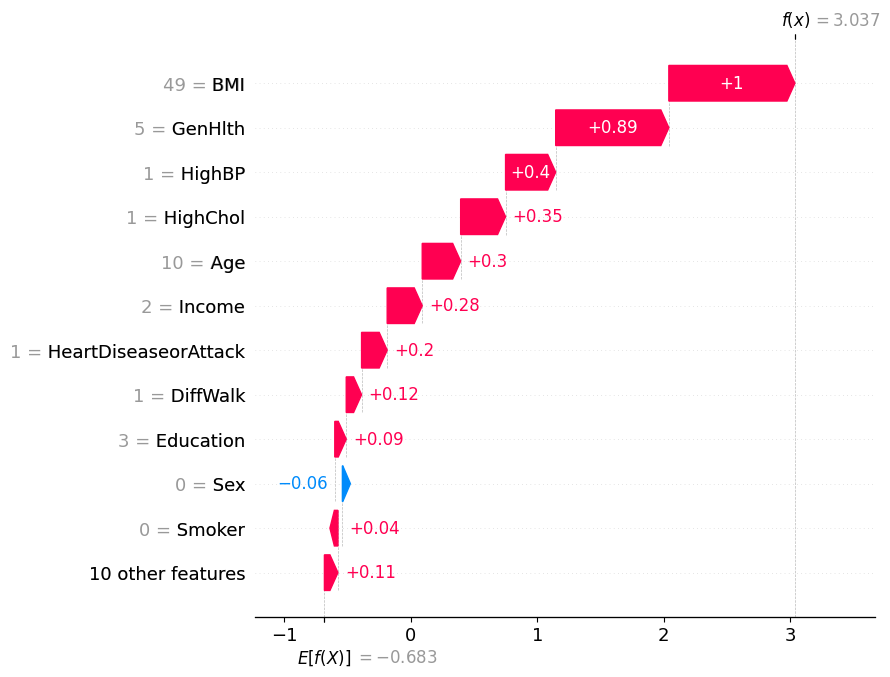

In [54]:
import shap
import numpy as np
import pandas as pd

# ---- Choose one example for local explanation ----
idx_local = int(np.argmax(test_proba))  # highest risk test case

# ---- Build a 1-row input safely (DataFrame if possible, otherwise array) ----
if isinstance(X_test_imp, pd.DataFrame):
    X_test_1 = X_test_imp.iloc[[idx_local]]
    feature_names = list(X_test_imp.columns)
else:
    # X_test_imp is numpy array
    X_test_1 = X_test_imp[idx_local:idx_local+1]  # shape (1, n_features)
    feature_names = None

# ---- Background sample for SHAP (keep small for speed) ----
if isinstance(X_train_imp, pd.DataFrame):
    background = X_train_imp.sample(n=min(2000, len(X_train_imp)), random_state=SEED)
else:
    # numpy array
    n_bg = min(2000, X_train_imp.shape[0])
    rng = np.random.default_rng(SEED)
    bg_idx = rng.choice(X_train_imp.shape[0], size=n_bg, replace=False)
    background = X_train_imp[bg_idx]

# ---- SHAP explainer ----
explainer = shap.TreeExplainer(xgb, data=background, feature_perturbation="interventional")
shap_values_1 = explainer(X_test_1)

print(f"Local explanation for TEST row index: {idx_local}")
print(f"Predicted probability: {float(test_proba[idx_local]):.4f}")
print(f"Predicted label (threshold {chosen_thr:.3f}): {int(test_proba[idx_local] >= chosen_thr)}")
print(f"True label: {int(y_test.iloc[idx_local] if hasattr(y_test, 'iloc') else y_test[idx_local])}")

# ---- Local plot (waterfall) ----
# If we don't have feature names, SHAP will still plot, but labels may be generic.
shap.plots.waterfall(shap_values_1[0], max_display=12)


## Results summary (what the prototype demonstrates)

This notebook demonstrates a complete, runnable screening prototype:
- Loads BRFSS 2015 indicators automatically (Kaggle-first, no-config fallback)
- Applies leakage-safe preprocessing and splitting
- Trains an XGBoost screening model with imbalance handling
- Chooses a recall-focused threshold on validation and evaluates once on test
- Produces standard and screening-relevant metrics (ROC-AUC, PR-AUC, recall, specificity)
- Checks probability calibration and subgroup performance
- Provides SHAP explainability for interpretability


### Test set results (threshold fixed from validation)

The classification threshold was selected on the **validation set** to meet a recall-focused screening objective (target recall ≥ 0.80). This threshold was then **fixed** and applied once to the **held-out test set** (no further tuning) to avoid optimistic bias.

On the test set, the model achieved **Recall/Sensitivity = 0.7954** and **Specificity = 0.6796**. This indicates the screening model captures most positive cases (few false negatives), at the expected cost of more false positives, which is acceptable for a screening workflow where flagged individuals are referred for confirmatory testing.
